In [3]:
import pandas as pd

- 카카오톡 데이터는 label도 없고 메시지도 짧음
- 사용할 때 양은 많은데 의미있는 데이터가 없을 수도 있어서 기존 정제보다 좀 더 어렵다
- 어떻게 정제해야할 지 고민해보면서 하면 좋은, 실전 프로젝트에 가장 가까운 정제 방법을 사용한다 생각
- nsmc 데이터에서는 정제를 한국어를 빼고 다 지워버렸지. 카카오톡 대화에서도 이렇게 해도 되는데 한국어만 나온다고 해서 모든 문제가 해결되는 건 또 아냐 -> 어떻게 할 건지 밑에 코드를 보면서 공부해보자

In [4]:
# 카카오톡 데이터를 불러와서 내용을 확인합니다.
data = pd.read_excel('data/kakao_talk_6girls2.xlsx')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28874 entries, 0 to 28873
Data columns (total 3 columns):
Date       28874 non-null object
User       28872 non-null object
Message    28874 non-null object
dtypes: object(3)
memory usage: 676.9+ KB
None
             Date User                 Message
0  2018. 5. 3. 00  주현              엥 결국 안먹음???
1  2018. 5. 3. 00  주현    너 그 야구부 엠티는 가는거야 그래서?
2  2018. 5. 3. 00  현영               ㅋㅋㅋㅋㅋㅋㅋㅋ안가
3  2018. 5. 3. 00  현영       근ㄷㅔ엄마한테갈거라고말해놓긴햇는디
4  2018. 5. 3. 00  현영           엄마가안보내주면..쩔수없고


In [5]:
# 메세지만 따로 불러옵니다.
corpus = data['Message']
corpus

0                   엥 결국 안먹음???
1         너 그 야구부 엠티는 가는거야 그래서?
2                    ㅋㅋㅋㅋㅋㅋㅋㅋ안가
3            근ㄷㅔ엄마한테갈거라고말해놓긴햇는디
4                엄마가안보내주면..쩔수없고
                  ...          
28869                      명화같다
28870                   ㅋㅋㅋㅋㅋㅋㅋ
28871                        사진
28872               카메라가 잘안잡힘 ㅠ
28873                       예쁘당
Name: Message, Length: 28874, dtype: object

In [6]:
# 데이터 전처리를 위한 전체 데이터의 특징을 빈도분석으로 파악해봅니다.
import nltk

# 한줄한줄 가져온 msg을 str으로 바꿔서 split해줘(단어기준) (2중 for문)
total_tokens = [token for msg in corpus for token in str(msg).split()]
print(len(total_tokens))

52406


In [7]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

28185
[('사진', 957), ('나', 666), ('이모티콘', 487), ('아', 426), ('근데', 399), ('ㅋㅋㅋㅋㅋㅋㅋㅋ', 307), ('ㅋㅋㅋㅋㅋㅋㅋ', 305), ('난', 301), ('ㅋㅋㅋㅋㅋㅋ', 300), ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 283)]


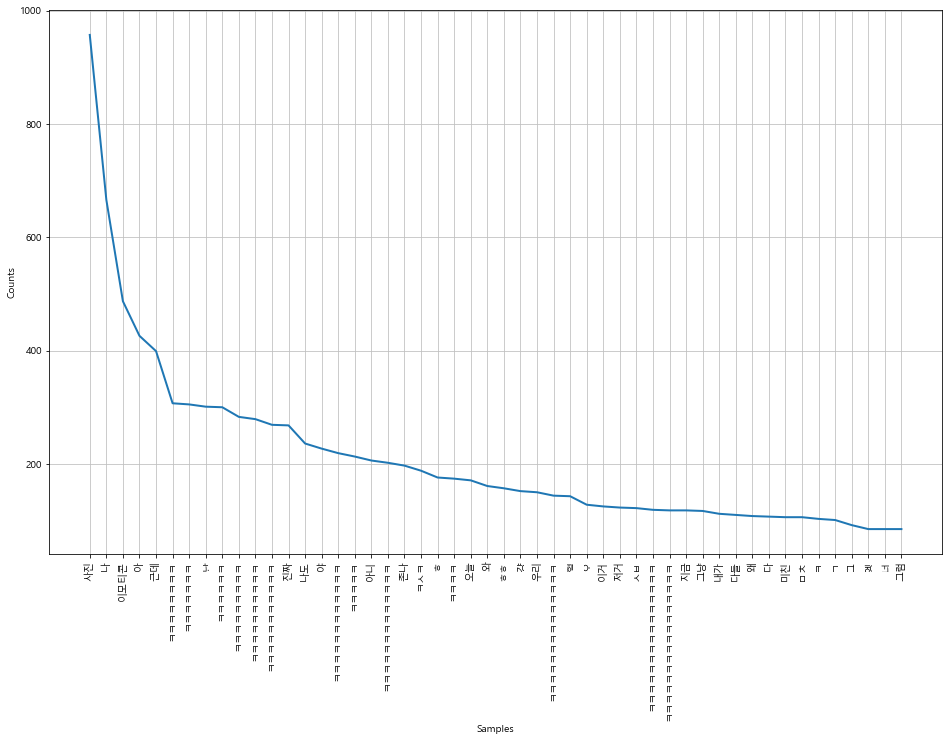

In [51]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [8]:
import re

def message_cleaning(docs): # docs는 여러개 받아온 것(편의상 한번에 처리하려고)

    """
        1. '사진', '이모티콘'은 그 내용을 알 수 없으므로 제거.
        2. 자음/모음 표현 처리방법.
            1) "ㅇㅇ" ,"ㅋㅋㅋㅋㅋ" 같은 자음만 존재하는 표현이나, "ㅡㅡ", "ㅠㅠ" 같은 모음만 존재하는 표현들은
            의미는 있으나 중요한 의미를 가지고 있지 않다고 판단하여 제거.
            2) 이러한 표현들도 전부 이모티콘 같은 감정 표현의 의성어로 쓰거나, 단축 표현이므로 제거하지 않음. 
        3. http:// 로 시작하는 hyperlink 제거.    
        4. 특수문자 제거.
    """
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in corpus]
    
    # 정규표현식 여러번 적용할 때 compile해서 지우면 속도면에서 이득있음
    
    # 1 - 사진/이모티콘 제거
    pattern1 = re.compile("사진|이모티콘") # 지울 패턴들
    docs = [pattern1.sub("", doc) for doc in docs] # .sub(뭐로 바꿀껀지, 뭘 바꿀껀지)
    
    # docs로 계속 저장해서 pattern1,2,3,4 할 때마다 update되는 방식으로!
    
    # 2 - 자음으로만/모음으로만 되어있는 단어 제거
    pattern2 = re.compile("[ㄱ-ㅎ]*|[ㅏ-ㅣ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3 - hyperlink 제거
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4 - 특수문자 제거
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding='utf-8') as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [9]:
SW = define_stopwords("data/stopwords-ko.txt")

# 카카오톡 텍스트를 정제합니다.
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

28874
[' 엥 결국 안먹음', ' 너 그 야구부 엠티는 가는거야 그래서', ' 안가', ' 근엄마한테갈거라고말해놓긴햇는디', ' ', ' 보내준다허면', ' 개이득', ' 파리타임', ' ', ' 마커롱 먹고싶따']


In [10]:
# 정제되어 지워지는 텍스트들을 확인하고 지워줍니다.

cleaned_text = pd.Series(cleaned_corpus) # 원래있던 csv에 붙여주려고 Series로 만들어줘
data['Message']  = cleaned_text
cleaned_data = data[data['Message'] != ' '] 
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22914 entries, 0 to 28873
Data columns (total 3 columns):
Date       22914 non-null object
User       22912 non-null object
Message    22914 non-null object
dtypes: object(3)
memory usage: 716.1+ KB


In [11]:
# 결과를 확인합니다.
cleaned_data.head()

,Date,User,Message
0,2018. 5. 3. 00,주현,엥 결국 안먹음
1,2018. 5. 3. 00,주현,너 그 야구부 엠티는 가는거야 그래서
2,2018. 5. 3. 00,현영,안가
3,2018. 5. 3. 00,현영,근엄마한테갈거라고말해놓긴햇는디
5,2018. 5. 3. 00,현영,보내준다허면


In [12]:
# 정제한 카카오톡 데이터를 저장합니다.

import pickle

with open("cleaned_data.pk", "wb") as f:
    pickle.dump(cleaned_data, f)